https://machinelearningmastery.com/standard-machine-learning-datasets/

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

Sonar DataSet은 다양한 각도에서 반환되는 소나의 강도를 고려하여 물체가 광산인지 암석인지 여부를 예측하는 것

In [ ]:
# 데이터셋 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
sonar_data = pd.read_csv(url, header=None)

In [ ]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [ ]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])

<ipython-input-50-9698207b9692>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])


In [ ]:
# 입력 데이터와 레이블 분리
X = sonar_data.iloc[:, :-1]
y = sonar_data.iloc[:, -1]

In [ ]:
# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####초기모델
- 2층 신경망
- 학습률 0.1
- 학습 횟수 200회

In [ ]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([60, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 1]))
        self.b2 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        return y2

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)

In [ ]:
eta = 0.1
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)
history = model.fit(x_train, y_train.astype(np.float32), epochs=300)

Epoch 1/300
6/6 [==============================] - 0s 2ms/step - loss: 0.3502
Epoch 2/300
6/6 [==============================] - 0s 2ms/step - loss: 0.3136
Epoch 3/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2892
Epoch 4/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2764
Epoch 5/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2622
Epoch 6/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2541
Epoch 7/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2472
Epoch 8/300
6/6 [==============================] - 0s 1ms/step - loss: 0.2388
Epoch 9/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2326
Epoch 10/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2301
Epoch 11/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2252
Epoch 12/300
6/6 [==============================] - 0s 1ms/step - loss: 0.2188
Epoch 13/300
6/6 [==============================] - 0s 2ms/st

<Axes: >

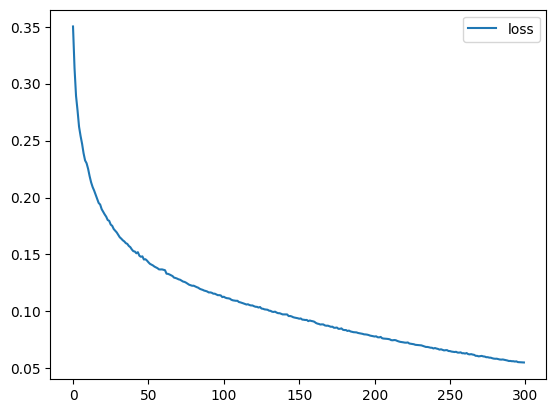

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()

####2차모델
- 3층 신경망
- 학습률 0.1
- 학습 횟수 200회

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 데이터셋 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
sonar_data = pd.read_csv(url, header=None)

sonar_data.info()

sonar_data.head()

# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])

# 입력 데이터와 레이블 분리
X = sonar_data.iloc[:, :-1]
y = sonar_data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([60, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 100]))
        self.b2 = tf.Variable(initializer([100]))
        self.w3 = tf.Variable(initializer([100, 1]))
        self.b3 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        y3 = tf.keras.activations.sigmoid(tf.matmul(y2, self.w3) + self.b3)
        return y3

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

<ipython-input-60-bd29ece76cf3>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])


In [ ]:
eta = 0.1
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train.astype(np.float32), epochs=300)

Epoch 1/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2754
Epoch 2/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2630
Epoch 3/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2608
Epoch 4/300
6/6 [==============================] - 0s 3ms/step - loss: 0.2566
Epoch 5/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2571
Epoch 6/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2520
Epoch 7/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 8/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2536
Epoch 9/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2552
Epoch 10/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2569
Epoch 11/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 12/300
6/6 [==============================] - 0s 2ms/step - loss: 0.2447
Epoch 13/300
6/6 [==============================] - 0s 2ms/st

<Axes: >

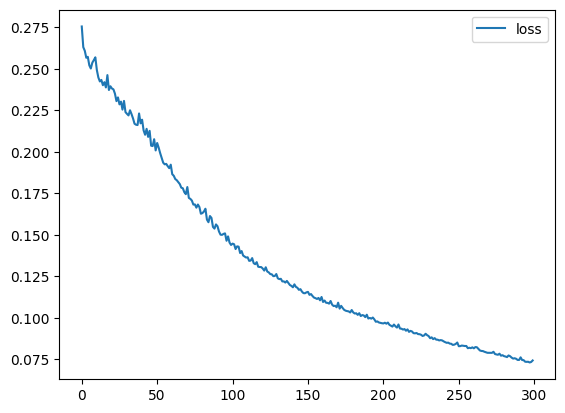

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()

####3차모델
- 3층 신경망
- 학습률 0.001
- 학습 횟수 500회

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 데이터셋 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
sonar_data = pd.read_csv(url, header=None)

sonar_data.info()

sonar_data.head()

# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])

# 입력 데이터와 레이블 분리
X = sonar_data.iloc[:, :-1]
y = sonar_data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([60, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 100]))
        self.b2 = tf.Variable(initializer([100]))
        self.w3 = tf.Variable(initializer([100, 1]))
        self.b3 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        y3 = tf.keras.activations.sigmoid(tf.matmul(y2, self.w3) + self.b3)
        return y3

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

<ipython-input-65-bd29ece76cf3>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])


In [ ]:
eta = 0.001
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train.astype(np.float32), epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2461
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2461
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2461
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2461
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2460
Epoch 6/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2460
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2460
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2460
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2460
Epoch 10/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2460
Epoch 11/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2460
Epoch 12/500
6/6 [==============================] - 0s 1ms/step - loss: 0.2460
Epoch 13/500
6/6 [==============================] - 0s 2ms/st

<Axes: >

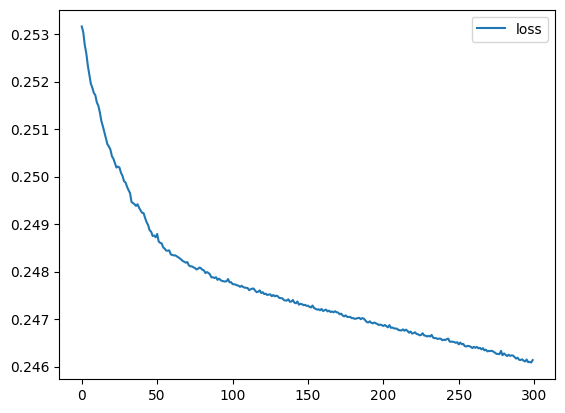

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()

####4차모델
- 4층 신경망
- 학습률 0.001
- 학습 횟수 500회

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 데이터셋 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
sonar_data = pd.read_csv(url, header=None)

sonar_data.info()

sonar_data.head()

# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])

# 입력 데이터와 레이블 분리
X = sonar_data.iloc[:, :-1]
y = sonar_data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([60, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 100]))
        self.b2 = tf.Variable(initializer([100]))
        self.w3 = tf.Variable(initializer([100, 70]))
        self.b3 = tf.Variable(initializer([70]))
        self.w4 = tf.Variable(initializer([70, 1]))
        self.b4 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        y3 = tf.keras.activations.sigmoid(tf.matmul(y2, self.w3) + self.b3)
        y4 = tf.keras.activations.sigmoid(tf.matmul(y3, self.w4) + self.b4)
        return y4

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

<ipython-input-71-0be1cbdbbf35>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])


In [ ]:
eta = 0.001
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train.astype(np.float32), epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 6/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2494
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2495
Epoch 11/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 12/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2494
Epoch 13/500
6/6 [==============================] - 0s 2ms/st

<Axes: >

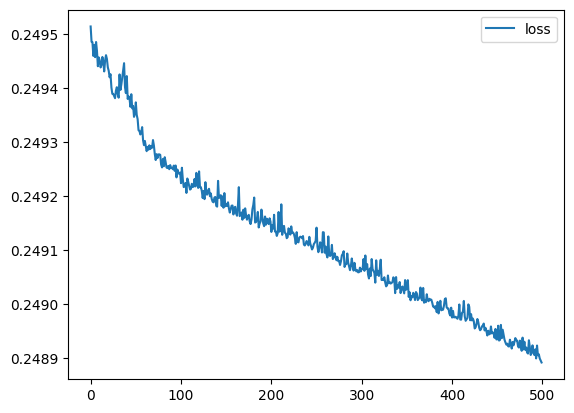

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()

####5차모델
- 5층 신경망
- 학습률 0.001
- 학습 횟수 500회

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 데이터셋 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
sonar_data = pd.read_csv(url, header=None)

sonar_data.info()

sonar_data.head()

# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])

# 입력 데이터와 레이블 분리
X = sonar_data.iloc[:, :-1]
y = sonar_data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([60, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 100]))
        self.b2 = tf.Variable(initializer([100]))
        self.w3 = tf.Variable(initializer([100, 70]))
        self.b3 = tf.Variable(initializer([70]))
        self.w4 = tf.Variable(initializer([70, 40]))
        self.b4 = tf.Variable(initializer([40]))
        self.w5 = tf.Variable(initializer([40, 1]))
        self.b5 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        y3 = tf.keras.activations.sigmoid(tf.matmul(y2, self.w3) + self.b3)
        y4 = tf.keras.activations.sigmoid(tf.matmul(y3, self.w4) + self.b4)
        y5 = tf.keras.activations.sigmoid(tf.matmul(y4, self.w5) + self.b5)
        return y5

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

<ipython-input-5-e0ae0f1b2154>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])


In [ ]:
eta = 0.001
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train.astype(np.float32), epochs=500)

Epoch 1/500
6/6 [==============================] - 1s 5ms/step - loss: 0.4485
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4483
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4480
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4477
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4474
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4471
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4468
Epoch 8/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4465
Epoch 9/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4462
Epoch 10/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4459
Epoch 11/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4456
Epoch 12/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4453
Epoch 13/500
6/6 [==============================] - 0s 4ms/st

<Axes: >

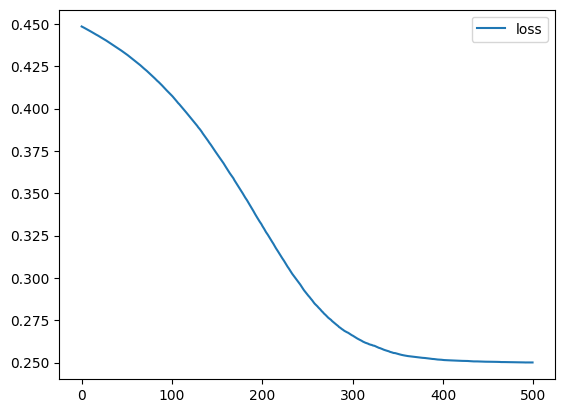

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()

####6차모델
- 6층 신경망
- 학습률 0.001
- 학습 횟수 500회

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 데이터셋 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
sonar_data = pd.read_csv(url, header=None)

sonar_data.info()

sonar_data.head()

# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])

# 입력 데이터와 레이블 분리
X = sonar_data.iloc[:, :-1]
y = sonar_data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([60, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 100]))
        self.b2 = tf.Variable(initializer([100]))
        self.w3 = tf.Variable(initializer([100, 70]))
        self.b3 = tf.Variable(initializer([70]))
        self.w4 = tf.Variable(initializer([70, 40]))
        self.b4 = tf.Variable(initializer([40]))
        self.w5 = tf.Variable(initializer([40, 20]))
        self.b5 = tf.Variable(initializer([20]))
        self.w6 = tf.Variable(initializer([20, 1]))
        self.b6 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        y3 = tf.keras.activations.sigmoid(tf.matmul(y2, self.w3) + self.b3)
        y4 = tf.keras.activations.sigmoid(tf.matmul(y3, self.w4) + self.b4)
        y5 = tf.keras.activations.sigmoid(tf.matmul(y4, self.w5) + self.b5)
        y6 = tf.keras.activations.sigmoid(tf.matmul(y5, self.w6) + self.b6)
        return y6

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

<ipython-input-1-c62efa468a87>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])


In [ ]:
eta = 0.001
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train.astype(np.float32), epochs=500)

Epoch 1/500
6/6 [==============================] - 4s 11ms/step - loss: 0.2525
Epoch 2/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2524
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2524
Epoch 4/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2524
Epoch 5/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2523
Epoch 6/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2523
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2523
Epoch 8/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2523
Epoch 9/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2523
Epoch 10/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2522
Epoch 11/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2522
Epoch 12/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2522
Epoch 13/500
6/6 [==============================] - 0s 8ms/s

<Axes: >

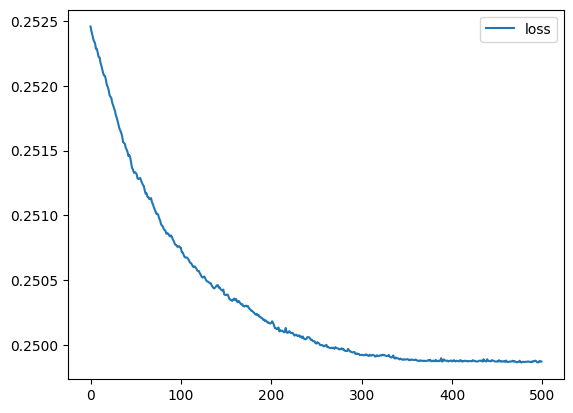

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()

####7차모델
- 7층 신경망
- 학습률 0.001
- 학습 횟수 500회

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 데이터셋 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
sonar_data = pd.read_csv(url, header=None)

sonar_data.info()

sonar_data.head()

# 레이블을 숫자로 인코딩
encoder = LabelEncoder()
sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])

# 입력 데이터와 레이블 분리
X = sonar_data.iloc[:, :-1]
y = sonar_data.iloc[:, -1]

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([60, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50, 100]))
        self.b2 = tf.Variable(initializer([100]))
        self.w3 = tf.Variable(initializer([100, 70]))
        self.b3 = tf.Variable(initializer([70]))
        self.w4 = tf.Variable(initializer([70, 40]))
        self.b4 = tf.Variable(initializer([40]))
        self.w5 = tf.Variable(initializer([40, 20]))
        self.b5 = tf.Variable(initializer([20]))
        self.w6 = tf.Variable(initializer([20, 10]))
        self.b6 = tf.Variable(initializer([10]))
        self.w7 = tf.Variable(initializer([10, 1]))
        self.b7 = tf.Variable(initializer([1]))

    def call(self, inputs):
        y1 = tf.keras.activations.sigmoid(tf.matmul(inputs, self.w1) + self.b1)
        y2 = tf.keras.activations.sigmoid(tf.matmul(y1, self.w2) + self.b2)
        y3 = tf.keras.activations.sigmoid(tf.matmul(y2, self.w3) + self.b3)
        y4 = tf.keras.activations.sigmoid(tf.matmul(y3, self.w4) + self.b4)
        y5 = tf.keras.activations.sigmoid(tf.matmul(y4, self.w5) + self.b5)
        y6 = tf.keras.activations.sigmoid(tf.matmul(y5, self.w6) + self.b6)
        y7 = tf.keras.activations.sigmoid(tf.matmul(y6, self.w7) + self.b7)
        return y7

def loss(target, y):
    return tf.reduce_mean((target - tf.cast(y, tf.float32))**2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

<ipython-input-81-269fa59760e4>:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sonar_data.iloc[:, -1] = encoder.fit_transform(sonar_data.iloc[:, -1])


In [ ]:
eta = 0.001
opt = tf.keras.optimizers.SGD(learning_rate=eta)
model = Model()
model.compile(optimizer=opt, loss=loss)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
history = model.fit(x_train, y_train.astype(np.float32), epochs=500)

Epoch 1/500
6/6 [==============================] - 1s 2ms/step - loss: 0.2501
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2501
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 6/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 11/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 12/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 13/500
6/6 [==============================] - 0s 2ms/st

<Axes: >

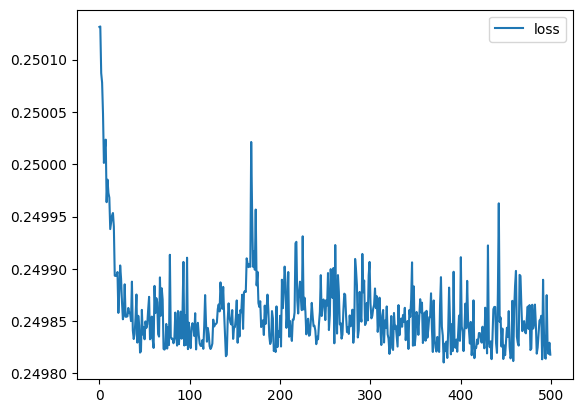

In [ ]:
# 학습 과정 시각화
pd.DataFrame(history.history).plot()